In [68]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
# importing the dataset
train_df=pd.read_excel("Data_Train.xlsx")
train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [70]:
# imporing the test dataset
test_df=pd.read_excel("Test_set.xlsx")
test_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info


In [71]:
test_df.shape

(2671, 10)

In [72]:
train_df.shape

(10683, 11)

In [73]:
# Merging both train and test dataset for feature engineering
# Appending is not working in python 3 so using concat
# final_df=train_df.append(test_df)
# final_df.head(1)
final_df = pd.concat([train_df, test_df], ignore_index=True)
final_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0


In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [75]:
final_df["Date"]=final_df["Date_of_Journey"].str.split("/").str[2]
final_df["Date"]

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
13349    2019
13350    2019
13351    2019
13352    2019
13353    2019
Name: Date, Length: 13354, dtype: object

In [76]:
# Changing the datatype of Date_of_Journey column
final_df["Date"]=final_df["Date_of_Journey"].str.split("/").str[0]
final_df["Month"]=final_df["Date_of_Journey"].str.split("/").str[1]
final_df["Year"]=final_df["Date_of_Journey"].str.split("/").str[2]
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [77]:
# Using lambda function to change the datatype of Date, Month, Year columns
final_df["Date"]=final_df["Date_of_Journey"].apply(lambda x:x.split("/")[0])
final_df["Month"]=final_df["Date_of_Journey"].apply(lambda x:x.split("/")[1])
final_df["Year"]=final_df["Date_of_Journey"].apply(lambda x:x.split("/")[2])
final_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019


In [78]:
# Changing the datatype of Date, Month, Year columns to integer
final_df["Date"]=final_df["Date"].astype(int)
final_df["Month"]=final_df["Month"].astype(int)
final_df["Year"]=final_df["Year"].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.3+ MB


In [79]:
# Dropping the Date_of_Journey column as we have created new columns Date, Month, Year
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [80]:
# Spliting the route column into Source and Destination
final_df["Source"]=final_df["Route"].str.split("→").str[0]
final_df["Destination"]=final_df["Route"].str.split("→").str[1]
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,BLR,DEL,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [81]:
# Dropping the Route column as we have created new columns Source and Destination
final_df.drop('Route',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,BLR,DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [82]:
# Splitting the Arrival_Time column to get only the hour and minutes
#final_df["Arrival_Time"]=final_df["Arrival_Time"].str.split(" ").str[0]
final_df.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,BLR,DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [83]:
# Splitting the Arrival_Time column to get only the hour and minutes
final_df["Arrival_date"] = final_df["Arrival_Time"].apply(lambda x: x.split(" ")[1] if len(x.split(" ")) > 1 else None)
final_df["Arrival_Time"] = final_df["Arrival_Time"].apply(lambda x: x.split(" ")[0])

In [84]:
final_df.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date
0,IndiGo,BLR,DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,22


In [85]:
# Splitting the Arrival_Time column to get only the hour and minute
final_df["Arrival_Hour"] = final_df["Arrival_Time"].apply(lambda x: x.split(":")[0])
final_df["Arrival_Minute"] = final_df["Arrival_Time"].apply(lambda x: x.split(":")[1])
final_df.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Arrival_Hour,Arrival_Minute
0,IndiGo,BLR,DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,22,01,10


In [86]:
# Drropping the Arrival_Time column as we have created new columns Arrival_Hour and Arrival_Minute
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [87]:
# Spliting the Dep_Time column to get only the hour and minute
final_df["Dep_Hour"]=final_df["Dep_Time"].str.split(":").str[0]
final_df["Dep_Minute"]=final_df["Dep_Time"].str.split(":").str[1]
final_df.head(1)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,BLR,DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,22,01,10,22,20


In [88]:
# Dropping Dep_Time column as we have created new columns Dep_Hour and Dep_Minute
final_df.drop('Dep_Time',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,BLR,DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,01,10,22,20


In [89]:
final_df.isna().sum()

Airline               0
Source                1
Destination           1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_date       7953
Arrival_Hour          0
Arrival_Minute        0
Dep_Hour              0
Dep_Minute            0
dtype: int64

In [90]:
# Changing the total stops column from categorical to numerical
final_df['Total_Stops'].value_counts()
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})
final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,BLR,DEL,2h 50m,0.0,No info,3897.0,24,3,2019,22,01,10,22,20


In [91]:
# Changing the duration to minutes
#final_df["Duration"]=final_df["Duration"].str.replace("h","*60").str.replace("m","*1").str.replace(" ","+")
#final_df.head(1)

In [92]:
# Convert Duration string to total minutes as integer
#final_df["Duration_minutes"] = final_df["Duration"].apply(lambda x: eval(x) if pd.notnull(x) else np.nan)
#final_df.head(1)

In [93]:
def extract_hours(duration):
	if 'h' in duration:
		return int(duration.split('h')[0].strip())
	else:
		return 0

def extract_minutes(duration):
	if 'm' in duration:
		if 'h' in duration:
			return int(duration.split('h')[1].replace('m','').strip())
		else:
			return int(duration.replace('m','').strip())
	else:
		return 0

final_df["Duration_hours"] = final_df["Duration"].apply(extract_hours)
final_df["Duration_minutes"] = final_df["Duration"].apply(extract_minutes)
final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hours,Duration_minutes
0,IndiGo,BLR,DEL,2h 50m,0.0,No info,3897.0,24,3,2019,22,01,10,22,20,2,50


In [94]:
final_df["Duration"]=final_df['Duration_hours']*60+final_df['Duration_minutes']

In [95]:
# Dropping the duration column as we have created new column Duration_minutes
#final_df.drop('Duration',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hours,Duration_minutes
0,IndiGo,BLR,DEL,170,0.0,No info,3897.0,24,3,2019,22,01,10,22,20,2,50


In [96]:
# Dropping the durration_hours and duration_minutes columns as we have created new column Duration
final_df.drop(['Duration_hours','Duration_minutes'],axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,BLR,DEL,170,0.0,No info,3897.0,24,3,2019,22,01,10,22,20


In [97]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [98]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])
final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_date,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,3,0,13,170,0.0,8,3897.0,24,3,2019,22,01,10,22,20


In [99]:
final_df.describe()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
count,13354.000000,13354.000000,13354.000000,13354.00000,13353.000000,13354.000000,10683.000000,13354.000000,13354.000000,13354.0
mean,3.977086,2.015651,11.901677,642.42287,0.826032,7.407743,9087.064121,13.389846,4.710574,2019.0
std,2.363997,1.205399,7.987999,506.71504,0.674632,1.198393,4611.359167,8.439060,1.165622,0.0
min,0.000000,0.000000,0.000000,5.00000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0
25%,3.000000,1.000000,7.000000,175.00000,0.000000,8.000000,5277.000000,6.000000,3.000000,2019.0
50%,4.000000,2.000000,7.000000,520.00000,1.000000,8.000000,8372.000000,12.000000,5.000000,2019.0
75%,4.000000,3.000000,14.000000,930.00000,1.000000,8.000000,12373.000000,21.000000,6.000000,2019.0
max,11.000000,5.000000,45.000000,2860.00000,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0


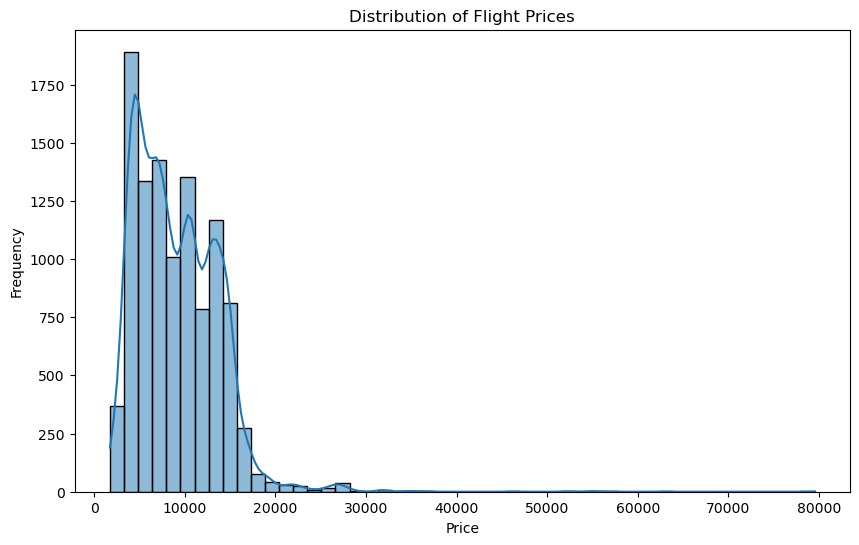

In [100]:
# Visualizing the distribution of flight prices
plt.figure(figsize=(10,6))
sns.histplot(final_df['Price'].dropna(), bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

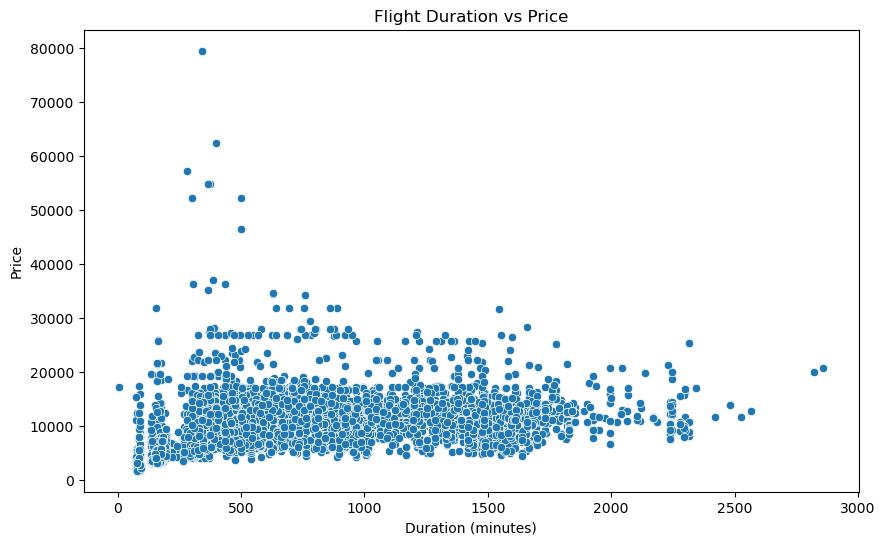

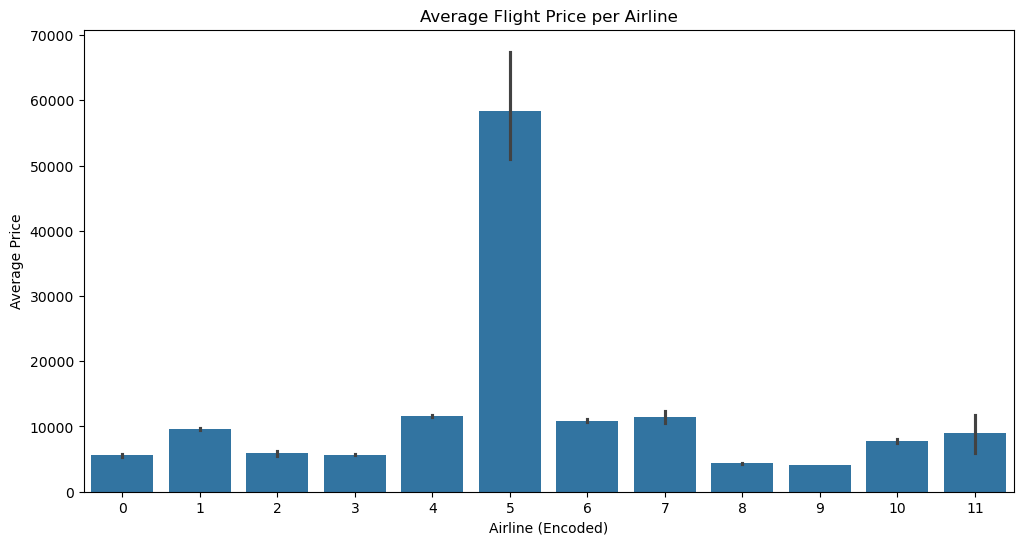

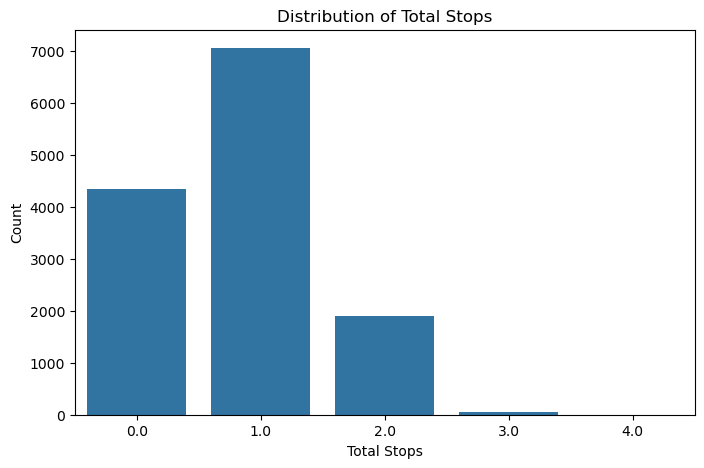

In [101]:
# Visualizing the relationship between Duration and Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration', y='Price', data=final_df)
plt.title('Flight Duration vs Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()

# Visualizing the average price per airline
plt.figure(figsize=(12,6))
sns.barplot(x='Airline', y='Price', data=final_df)
plt.title('Average Flight Price per Airline')
plt.xlabel('Airline (Encoded)')
plt.ylabel('Average Price')
plt.show()

# Visualizing the distribution of Total Stops
plt.figure(figsize=(8,5))
sns.countplot(x='Total_Stops', data=final_df)
plt.title('Distribution of Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.show()

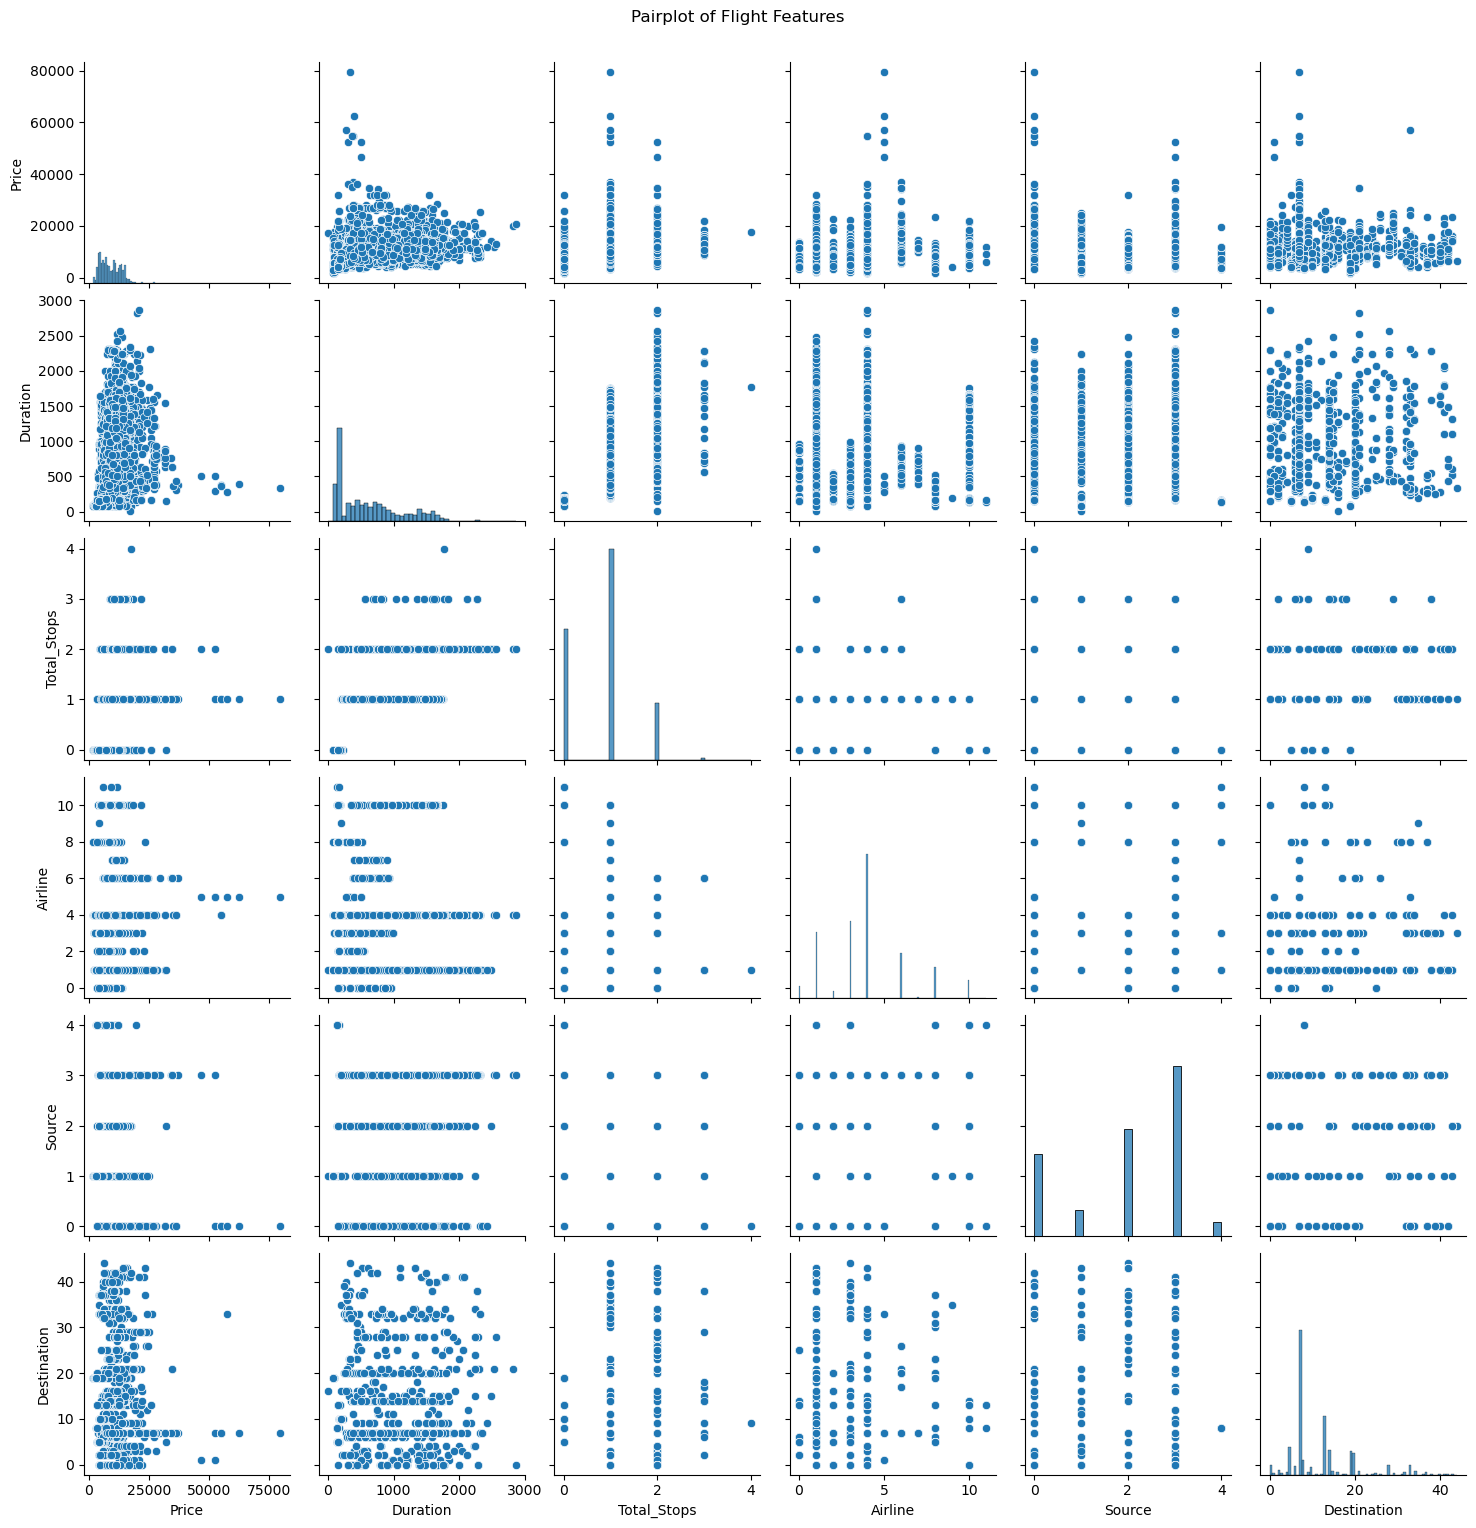

In [102]:
# Visualizing pairwise relationships in the dataset using seaborn's pairplot
sns.pairplot(final_df[['Price', 'Duration', 'Total_Stops', 'Airline', 'Source', 'Destination']].dropna())
plt.suptitle('Pairplot of Flight Features', y=1.02)
plt.show()